# Learn with Function Transformer

* Log Transformer
* Reciprocal Transformer
* (Square/Square Root)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df= pd.read_csv('/kaggle/input/titanic/titanicdata.csv', usecols= ['Age','Fare', 'Survived'])

In [6]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
X= df.iloc[:, 1:3]
y= df.iloc[:, 0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [12]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


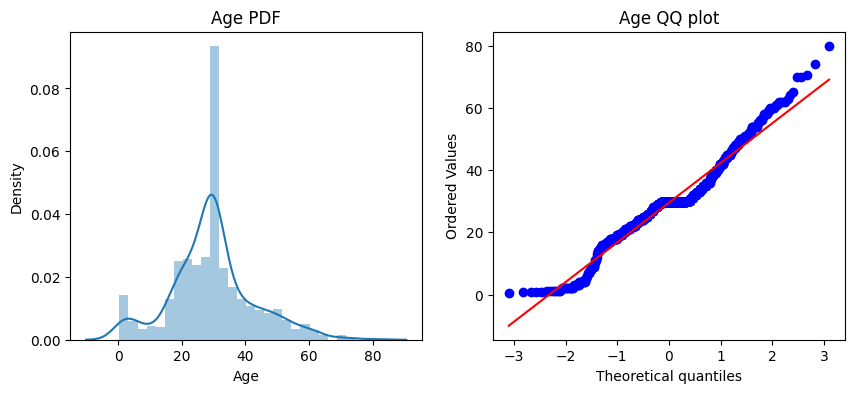

In [13]:
plt.figure(figsize= (10, 4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist= 'norm', plot= plt)
plt.title('Age QQ plot')

plt.show()

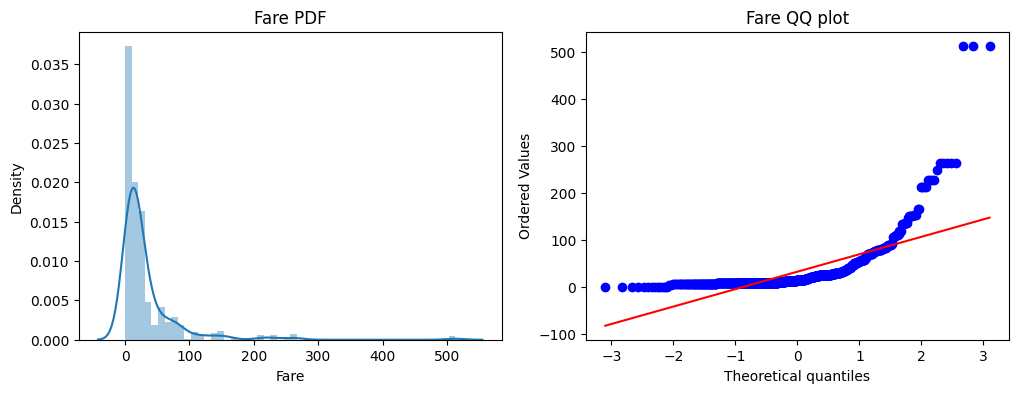

In [14]:
plt.figure(figsize= (12, 4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist= 'norm', plot= plt)
plt.title('Fare QQ plot')

plt.show()

In [15]:
lr= LogisticRegression()
dtc= DecisionTreeClassifier(random_state= 0)

In [16]:
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)

y_pred= lr.predict(X_test)
y_pred2= dtc.predict(X_test)

print('LR', accuracy_score(y_test, y_pred))
print('DTC', accuracy_score(y_test, y_pred2))

LR 0.6480446927374302
DTC 0.6703910614525139


In [17]:
FT= FunctionTransformer(func= np.log1p)

In [18]:
X_train_transformed= FT.fit_transform(X_train)
X_test_transformed= FT.transform(X_test)

In [19]:
lr= LogisticRegression()
dtc= DecisionTreeClassifier(random_state= 0)

lr.fit(X_train_transformed, y_train)
dtc.fit(X_train_transformed, y_train)

y_pred= lr.predict(X_test_transformed)
y_pred2= dtc.predict(X_test_transformed)

print('Accuracy score', accuracy_score(y_pred, y_test))
print('Accuracy score', accuracy_score(y_pred2, y_test))

Accuracy score 0.6815642458100558
Accuracy score 0.6815642458100558


In [20]:
X_transformed = FT.fit_transform(X)

le = LogisticRegression()
dtc = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(le,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dtc,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610986267166042


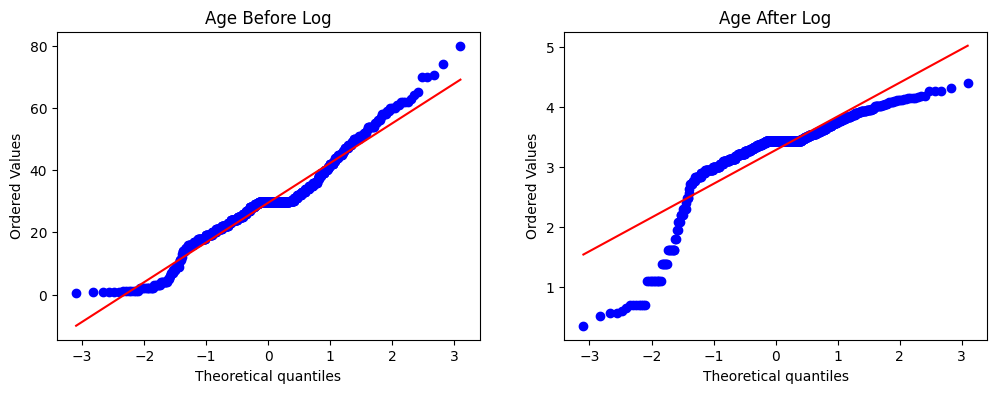

In [21]:
plt.figure(figsize= (12, 4))


plt.subplot(121)
stats.probplot(X_train['Age'], dist= 'norm', plot= plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist= 'norm', plot= plt)
plt.title('Age After Log')

plt.show()

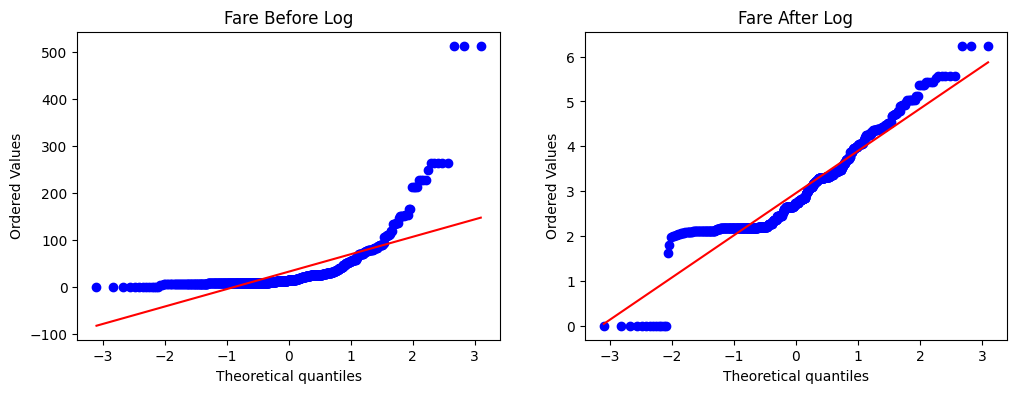

In [22]:
plt.figure(figsize= (12, 4))


plt.subplot(121)
stats.probplot(X_train['Fare'], dist= 'norm', plot= plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist= 'norm', plot= plt)
plt.title('Fare After Log')

plt.show()

In [23]:
TCF= ColumnTransformer([
    ('log', FunctionTransformer(), ['Fare'])
], remainder= 'passthrough')

X_train_transformed2= TCF.fit_transform(X_train)
X_test_transformed2= TCF.transform(X_test)

In [24]:
le= LogisticRegression()
dtc= DecisionTreeClassifier()

le.fit(X_train_transformed2, y_train)
dtc.fit(X_train_transformed2, y_train)

y_pred= le.predict(X_test_transformed2)
y_pred2= dtc.predict(X_test_transformed2)

print('LE Acc', accuracy_score(y_test, y_pred))
print('DTC Acc', accuracy_score(y_test, y_pred2))

LE Acc 0.6480446927374302
DTC Acc 0.6871508379888268


In [25]:
X_transformed2= TCF.fit_transform(X)

le= LogisticRegression()
dtc= DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(le,X_transformed2,y, scoring= 'accuracy', cv= 10)))
print('DT', np.mean(cross_val_score(dtc,X_transformed2, y, scoring= 'accuracy', cv= 10)))

LR 0.6589013732833957
DT 0.6554806491885145


In [26]:
def apply_transform(transform):

    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    CTF = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = CTF.fit_transform(X)
    
    le = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(le,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


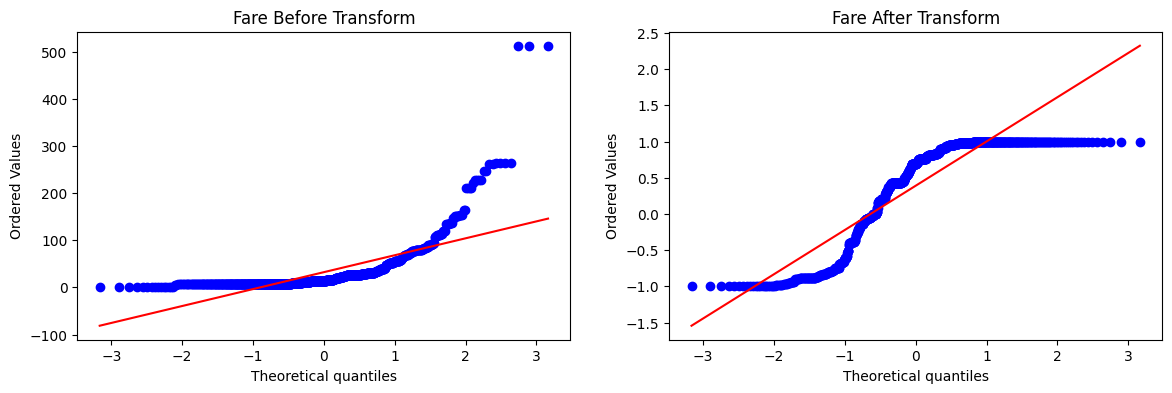

In [27]:
apply_transform(np.sin)